# Q3

In [37]:
import random
import numpy as np
import math
random.seed(1)
import matplotlib.pyplot as plt 

Making the dataset. I randomly take some values between 0, 20 and store them using a set to ensure unique data points. Then I make our final data set which includes the appended labels. 

In [38]:
data = set()
for i in range(21):
  for j in range(21):
    x = round(-2 +  i*0.2, 2)
    y = round(-2 + j*0.2, 2)
    data.add((x,y))
data_list = list(data)
print(len(data_list))
data_array = np.array(data_list)

441


In [39]:
#Mapping
data_mapped = []
for point in data_list:
    if (point[0]**2) + (point[1]**2) <= 1:
        data_mapped.append([point[0], point[1], 1])
    else:
        data_mapped.append([point[0], point[1], -1])

In the next block, I shuffle my data and then divide it into 80-20 train test split and then take out the labels to use only data for the code.

In [40]:
inp = random.sample(data_mapped, len(data_mapped))
final_data = np.array(inp)
train_size = int(0.8 * len(inp))
train_set = final_data[:train_size]
test_set = final_data[train_size:]
X_train = train_set[:, :2]
y_train = train_set[:, 2:]
X_test = test_set[:, :2]
y_test = test_set[:, 2:]

This next block defines all the required functions. They include the kernel gaussian function calculation, getting interpolation matrix(Weight matrix), getting prediction values, MSE calculation and accuracy calculation. 

In [41]:
def gaussian_fn(distance, sig):
    return np.exp(-(distance)**2 / (2* (sig**2)))

def mse(actual, pred):
    summation = 0
    for i in range(len(pred)):
        diff = actual[i] - pred[i]
        squared_diff = diff**2
        summation = summation + squared_diff
    error = summation/len(pred)
    return error

def calcWeight(X_train, X_cent, sigma):
  G = np.zeros((len(X_train), len(X_cent)))
  for i in range(len(X_train)):
    for j in range(len(X_cent)):
      dist = np.linalg.norm(X_train[i] - X_cent[j])
      G[i][j] = gaussian_fn(dist, sigma)
  G1 = np.linalg.pinv(G)
  W = G1.dot(y_train)
  y_pred = G.dot(W)
  return y_pred, W

def pred(X_test, X_t, sigma, W):
  g1 = np.zeros((len(X_test), len(X_t)))
  for i in range(len(X_test)):
    for j in range(len(X_t)):
      dist = np.linalg.norm(X_test[i] - X_t[j])
      g1[i][j] = gaussian_fn(dist, sigma)  
  y_pred_test = g1.dot(W)
  return y_pred_test

def acc(y_train, y_pred):
  acc=np.mean(y_train==np.sign(y_pred))
  return round(acc*100, 2)

The code blocks below use the functions defined to get the accuracy and error for the different cases as required in the assignment.
The training and test accuracies for all the runs can be seen in the output blocks for each case.

#1. Using all the points in the training set as Centres

In [42]:
sigmas = [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75, 1, 3, 5, 7, 10, 12, 15, 17, 20, 25, 30, 35]
train_accuracy = []
test_accuracy = []
train_error = []
test_error = []
for sigma in sigmas:
  print("For Sigma = ", sigma)
  y_pred, W = calcWeight(X_train, X_train, sigma)
  y_pred_test = pred(X_test, X_train, sigma, W)
  print("Train Accuracy: ", (acc(y_train, y_pred)))
  print("Test Accuracy: ", acc(y_test, y_pred_test))
  print("Train Error: ", mse(y_train, y_pred)[0])
  print("Test Error: ", mse(y_test, y_pred_test)[0])
  train_accuracy.append(acc(y_train, y_pred))
  test_accuracy.append(acc(y_test, y_pred_test))
  train_error.append(mse(y_train, y_pred)[0])
  test_error.append(mse(y_test, y_pred_test)[0])

For Sigma =  0.01
Train Accuracy:  100.0
Test Accuracy:  96.63
Train Error:  1.3562748837455712e-30
Test Error:  1.0
For Sigma =  0.03
Train Accuracy:  100.0
Test Accuracy:  96.63
Train Error:  2.292980676570171e-29
Test Error:  0.9999999988304806
For Sigma =  0.05
Train Accuracy:  100.0
Test Accuracy:  96.63
Train Error:  5.36851221152538e-30
Test Error:  0.9982452499613711
For Sigma =  0.1
Train Accuracy:  100.0
Test Accuracy:  96.63
Train Error:  3.659757131048865e-30
Test Error:  0.5084299006895513
For Sigma =  0.15
Train Accuracy:  100.0
Test Accuracy:  95.51
Train Error:  6.162065382429081e-30
Test Error:  0.19056038449875398
For Sigma =  0.2
Train Accuracy:  100.0
Test Accuracy:  92.13
Train Error:  2.1985075097545227e-28
Test Error:  0.23601981221827836
For Sigma =  0.25
Train Accuracy:  100.0
Test Accuracy:  91.01
Train Error:  5.472168944169246e-26
Test Error:  0.4633668299771678
For Sigma =  0.5
Train Accuracy:  100.0
Test Accuracy:  67.42
Train Error:  3.31927434275721e-09


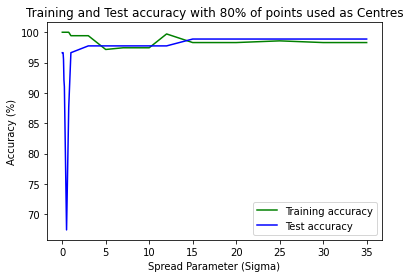

In [43]:
plt.plot(sigmas, train_accuracy, 'g', label='Training accuracy')
plt.plot(sigmas, test_accuracy, 'b', label='Test accuracy')
plt.title('Training and Test accuracy with 80% of points used as Centres')
plt.xlabel('Spread Parameter (Sigma)')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()


For the analysis, we will use Accuracy as a metric for performance.
From the above graph, we see that training accuracy remains high for almost all the sigmas and it gets stable at sigma = 15. While, test accuracy starts off pretty good, it sees at sigma = 0.5 and 0.75 and then again goes up while stabling at 98.87% beyond sigma = 15.
This maybe because for low values of sigmas, we observe little or no overlap of gaussian functions of different data points. Thus, all the centres are correctly identifying the input data which are the centres itself and hence we observe a training accuracy of almost 100%. This leads to overfitting on the training set and hence we see that for sigma = 0.5 and 0.75, the test accuracy goes down significantly.
In the general notion, a large spread parameter implies less senstivity i.e. the kernel is more sensitive to data points that are near the centre (small sigma value) and as we go further away from centres (large sigma value) the senstivity decreases. Thus, we see a negligible decrease (around 2%) in training accuracy because the kernel function becomes less sensitive to data points but the accuracy remains pretty high as the centres are the data points itself and thus they classify the data points pretty accurately. The test accuracy seems to increase and then become stable after sigma = 15.
Looking at the test accuracies, we will choose sigma = 15. The testing accuracy remains stable after this point. Choosing sigma = 15 ensures that value of sigma is neither too high nor too low.

# 2a). Using Random 150 Nodes as Centres


In [44]:
train_set_list = list(train_set)
centres_list = random.choices(train_set_list, k=150)
centres = np.array(centres_list)
centres.shape
X_t = centres[:, :2]
y_t = centres[:, 2:]
#print(X_t.shape, y_t.shape)

In [45]:
sigma = 15
y_pred_rand, W1 = calcWeight(X_train, X_t, sigma)
y_pred_test_rand = pred(X_test, X_t, sigma, W1)
print("Train Accuracy: ", acc(y_train, y_pred_rand))  
print("Test Accuracy: ", acc(y_test, y_pred_test_rand))
mse_train_rand = mse(y_train, y_pred_rand)[0]
mse_test_rand = mse(y_test, y_pred_test_rand)[0]
print("Train Error: " + str(mse_train_rand))
print("Test Error: " + str(mse_test_rand))

Train Accuracy:  98.3
Test Accuracy:  98.88
Train Error: 0.19611863321444545
Test Error: 0.1750342479570414


# 2b). Using K-Means to get 150 Centres


In [46]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters = 150)
clf.fit(X_train)
cent = clf.cluster_centers_
cent.shape
X_cent = cent

In [47]:
sigma = 15
y_pred_kmeans, W2 = calcWeight(X_train, X_cent, sigma)
y_pred_test_kmeans = pred(X_test, X_cent, sigma, W2)
print("Train Accuracy: ", acc(y_train, y_pred_kmeans))  
print("Test Accuracy: ", acc(y_test, y_pred_test_kmeans))
mse_train_kmeans = mse(y_train, y_pred_kmeans)[0]
mse_test_kmeans = mse(y_test, y_pred_test_kmeans)[0]
print("Train Error: " + str(mse_train_kmeans))
print("Test Error: " + str(mse_test_kmeans))

Train Accuracy:  98.3
Test Accuracy:  98.88
Train Error: 0.19611751738585168
Test Error: 0.17505316171292534


### Comparing Outputs from part 1 to part 2 a) and 2 b)

We see that accuracies are almost identical in parts 1 and 2. In general, for a particular data, a specific number of neurons in hidden layer are enough to represent whole of the data in RBFN. In our case, the similar accuracies may be due to the fact that the number of neurons needed in the hidden cell is an arbitrary number  which can be less than 150 too which we have not explored in this analysis. But, from the findings, we can make a point that 150 nodes in the hidden layer are sufficient to map all of the data points. Thus, taking any number of nodes greater than 150 for our hidden layer will not benefit us as we will get similar accuracies as we already can map all the data through these 150 centres. The errors reported are also quite similar and we see negligible difference in the errors. 